In [1]:
import pandas as pn
import numpy as np
import matplotlib.pyplot as mtp
from datetime import datetime
from pandasql import sqldf
#importing necessary libraries

In [2]:
data = pn.read_excel('HireArt - Data Analyst Exercise 10.12.17.xlsx')
# reading the excel file

In [3]:
#checking data for anomalities
data.head()

,Account manager,Client Name,Date of Contact
0,Milan Crona,"Wyman, Farrell and Haag",2015-10-31
1,Aidan Pouros,"Veum, McClure and Schuster",2013-12-15
2,Aidan Pouros,"Veum, McClure and Schuster",2013-12-07
3,Milan Crona,Armstrong Group,2013-11-02
4,Aidan Pouros,"Lueilwitz, Moore and Hahn",2013-12-25


In [4]:
data.isnull().values.any()

False

In [5]:
data['Date of Contact'].min()

Timestamp('2013-10-03 00:00:00')

In [6]:
data['Date of Contact'].max()

Timestamp('2017-09-29 00:00:00')

In [7]:
#it can be seen that there's no null values to clean, contact dates are reasonable
#parsing date of contact column
data['Year'] = data['Date of Contact'].dt.year
data['Month'] = data['Date of Contact'].dt.month
data['Day'] = data['Date of Contact'].dt.day

In [8]:
data

,Account manager,Client Name,Date of Contact,Year,Month,Day
0,Milan Crona,"Wyman, Farrell and Haag",2015-10-31,2015,10,31
1,Aidan Pouros,"Veum, McClure and Schuster",2013-12-15,2013,12,15
2,Aidan Pouros,"Veum, McClure and Schuster",2013-12-07,2013,12,7
3,Milan Crona,Armstrong Group,2013-11-02,2013,11,2
4,Aidan Pouros,"Lueilwitz, Moore and Hahn",2013-12-25,2013,12,25
...,...,...,...,...,...,...
996,Aidan Pouros,Bosco-Ortiz,2014-04-13,2014,4,13
997,Milan Crona,Halvorson LLC,2016-09-16,2016,9,16
998,Chauncey Dach,Franecki-Feil,2015-03-21,2015,3,21
999,Milan Crona,Abbott Group,2017-09-27,2017,9,27


In [9]:
data.groupby('Month').count()['Client Name']
#checking Clients' monthly contact frequency without distinction

Month
1      60
2      64
3      58
4      52
5      69
6      77
7      66
8      79
9     121
10    213
11     65
12     77
Name: Client Name, dtype: int64

In [10]:
pysqldf = lambda q: sqldf(q, globals())
pysqldf("SELECT Month, COUNT(1) FROM data GROUP BY Month")
#We can also use pandasql for same operations, I am more comfortable with SQL, so I will continue using SQL from now on

,Month,COUNT(1)
0,1,60
1,2,64
2,3,58
3,4,52
4,5,69
5,6,77
6,7,66
7,8,79
8,9,121
9,10,213


In [11]:
data['Client_Name'] = data['Client Name'] #library is whitespace sensitive, changing column name
pysqldf("SELECT Month, COUNT(DISTINCT Client_Name) FROM data GROUP BY Month ORDER BY Month ASC")
#Checking distinct client reach counts for each month

,Month,COUNT(DISTINCT Client_Name)
0,1,30
1,2,31
2,3,29
3,4,26
4,5,33
5,6,34
6,7,28
7,8,33
8,9,33
9,10,35


In [12]:
#there's no significant difference between months for unique client contacts
pysqldf("SELECT COUNT(DISTINCT Client_Name) as DistinctClientCount FROM data ") #there are 35 different clients

,DistinctClientCount
0,35


In [13]:
pysqldf("SELECT Month, 100.00 * COUNT(DISTINCT Client_Name)/35 as Percentage FROM data GROUP BY Month ORDER BY Percentage DESC")
#if we combine every year then this will be our percentage

,Month,Percentage
0,10,100.000000
1,6,97.142857
2,9,94.285714
3,8,94.285714
4,5,94.285714
5,12,91.428571
6,2,88.571429
7,11,85.714286
8,1,85.714286
9,3,82.857143


In [14]:
#As seen above, it is more likely to team contact clients in October (without Year consideration)
month_perc = pysqldf("SELECT Month, 100.00 * COUNT(DISTINCT Client_Name)/35 as Percentage FROM data GROUP BY Month ORDER BY Percentage DESC")

<BarContainer object of 12 artists>

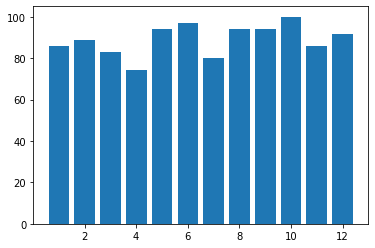

In [15]:
mtp.bar(month_perc['Month'],month_perc['Percentage'])
#Can visualize contact percentage by month

In [16]:
#I realized that we should also check for years and calculate average distinct count of clients by including year parameter
#to our calculation
month_year_perc = pysqldf("SELECT Month, Year, 100.00 * COUNT(DISTINCT Client_Name)/35 as Percentage FROM data GROUP BY Month, Year ORDER BY Percentage DESC")

In [17]:
YearlyContactPerc = pysqldf("SELECT Month, SUM(Percentage)/COUNT(Year) AS YearlyPercentage FROM month_year_perc GROUP BY Month ORDER BY YearlyPercentage DESC")
pysqldf("SELECT Month, SUM(Percentage)/COUNT(Year) AS YearlyPercentage FROM month_year_perc GROUP BY Month ORDER BY YearlyPercentage DESC")

,Month,YearlyPercentage
0,10,80.000000
1,9,57.857143
2,12,43.571429
3,6,43.571429
4,8,42.142857
5,5,39.285714
6,2,37.857143
7,7,37.142857
8,1,35.714286
9,11,35.000000


<BarContainer object of 12 artists>

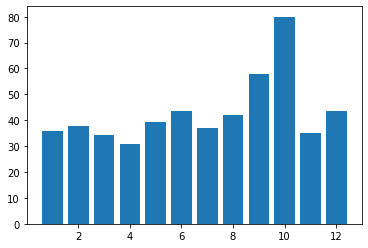

In [18]:
#Now, it is obvious that we will introduce our product in October 
mtp.bar(YearlyContactPerc['Month'],YearlyContactPerc['YearlyPercentage'])
#Can visualize contact percentage by month